In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
    data = pd.read_csv('../pp_seq2seq/data/NYUTaxi/Taxi.csv')

    # 06/19/2018 08:13:00 AM
    # data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format = '%m/%d/%Y %I:%M:%S %p')
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
    data = data[(data['tpep_pickup_datetime'].dt.year == 2019)]
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')
    data = data[(data['tpep_dropoff_datetime'].dt.year == 2019)]
    data['pickup'] = data.tpep_pickup_datetime.values.astype(np.int64) // 10 ** 9
    data['dropoff'] = data.tpep_dropoff_datetime.values.astype(np.int64) // 10 ** 9

    data['Time'] = data['pickup']
    data['loc'] = data['PULocationID']
    data['ID1'] = '1'
    data['ID2'] = '2'

In [3]:
data['Time'].head(20)

0     1546303600
1     1546304387
7     1546302088
8     1546302721
9     1546304252
10    1546302244
11    1546302119
12    1546303521
13    1546303399
14    1546304304
15    1546302194
16    1546303191
17    1546303560
18    1546304265
19    1546301776
20    1546303603
21    1546303681
22    1546304127
23    1546301995
24    1546301633
Name: Time, dtype: int64

In [25]:
    data1 = pd.DataFrame()
    data1['Time'] = data['Time'].append(data['dropoff'], ignore_index=True)
    data1['loc'] = data['loc'].append(data['DOLocationID'], ignore_index=True)
    data1['ID'] = data['ID1'].append(data['ID2'], ignore_index=True)
    data1 = data1.sort_values(['Time'], ascending=True)
    data1 = data1.reset_index()

In [26]:
#data1['Time'] = data1['Time']-data1['Time'][0]
data1_gaps = pd.Series(data1['Time'][1:].values - data1['Time'][:-1].values)

data1_grouped = data1.groupby(['loc'])

In [27]:
data1_loc = data1[data1['loc']==1].reset_index()

data1_loc['gaps'] = pd.Series([0.]+(data1_loc['Time'][1:].values - data1_loc['Time'][:-1].values).tolist())
#for d in data1_grouped:
#    print(d)
#    break

(array([141., 226., 204., 159., 158., 170., 168., 155., 170., 157., 135.,
        163., 126., 127., 132., 142., 129., 124.,  98.,  96., 110., 102.,
        118.,  91., 112.,  95., 117., 110.,  89.,  97.,  99.,  95., 110.,
         85.,  92.,  86.,  84.,  82.,  84.,  90.,  64.,  75.,  79.,  67.,
         66.,  59.,  79.,  65.,  79.,  60.,  75.,  86.,  62.,  60.,  66.,
         59.,  78.,  57.,  63.,  57.,  57.,  49.,  54.,  57.,  56.,  52.,
         62.,  46.,  68.,  48.,  33.,  55.,  48.,  43.,  49.,  42.,  47.,
         25.,  45.,  38.,  51.,  54.,  33.,  44.,  45.,  34.,  42.,  33.,
         40.,  41.,  45.,  34.,  51.,  35.,  36.,  18.,  28.,  31.,  30.,
         43.,  32.,  31.,  33.,  36.,  26.,  26.,  36.,  21.,  23.,  28.,
         35.,  27.,  26.,  26.,  20.,  23.,  20.,  28.,  24.,  31.,  23.,
         17.,  25.,  27.,  26.,  23.,  21.,  32.,  24.,  27.,  27.,  28.,
         21.,  18.,  23.,  25.,  29.,  25.,  22.,  19.,  20.,  13.,  22.,
         13.,  22.,  18.,  14.,  16., 

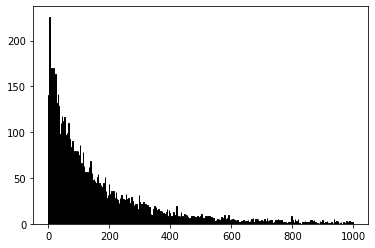

In [118]:
gaps = data1_loc['gaps']
#bin_edges = range(0, int(max(gaps)+1), 2)
bin_edges = range(0, 1000, 2)
plt.hist(gaps, bin_edges, edgecolor='black', linewidth=1.)

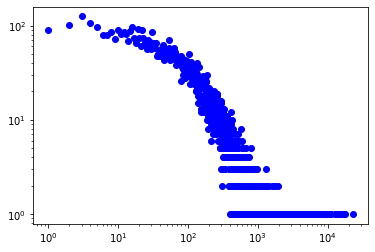

In [115]:
from collections import Counter
from operator import itemgetter
gaps = data1_loc['gaps']
bin_edges = range(0, 1000, 2)
bins = Counter(gaps)
#print(bins)
x, y = zip(*sorted(bins.items(), key=itemgetter(0)))
plt.loglog(x, y, 'bo')

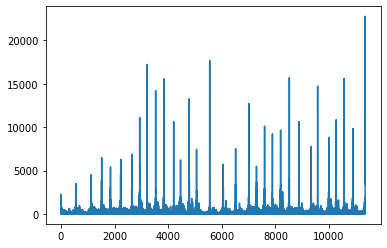

In [63]:
plt.plot(gaps)

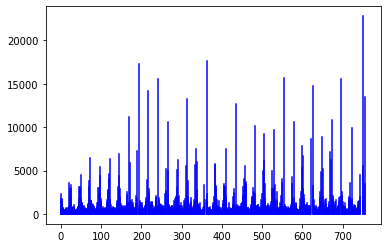

In [84]:
begin_t = data1_loc['Time'][0]
prev_ts = 0
for t in data1_loc['Time']:
    ts = t - begin_t
    plt.plot(np.array([ts, ts])/3600., [0, ts-prev_ts], 'b')
    prev_ts = ts

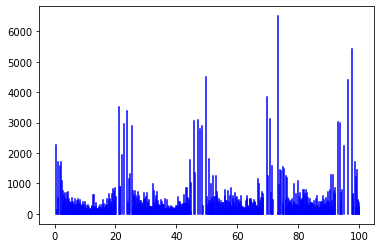

In [85]:
begin_t = data1_loc['Time'][0]
prev_ts = 0
for t in data1_loc['Time']:
    ts = t - begin_t
    if ts<100*3600.:
        plt.plot(np.array([ts, ts])/3600., [0, ts-prev_ts], 'b')
        prev_ts = ts

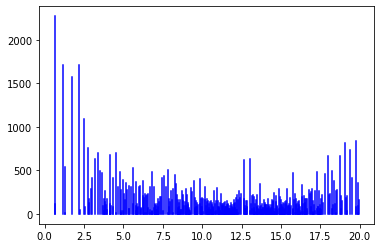

In [97]:
begin_t = data1_loc['Time'][0]
prev_ts = 0
for t in data1_loc['Time']:
    ts = t - begin_t
    if ts<20*3600. and ts>0*3600.:
        plt.plot(np.array([ts, ts])/3600., [0, ts-prev_ts], 'b')
    prev_ts = ts

In [77]:
num_sec_spanned = data1_loc['Time'].values[-1]-data1_loc['Time'].values[0]
print('Number of seconds spanned:', num_sec_spanned)
print('Number of hours spanned:', num_sec_spanned/3600.)

Number of seconds spanned: 2723267
Number of hours spanned: 756.4630555555556
